In [1]:
import numpy as np
import pandas as pd

In [2]:
dtype = {'type': np.int8, 'clear_text': str,}
path = 'C:/Users/user/sentiment/clear_binary_twitts.csv' #home

In [3]:
df = pd.read_csv (path, sep=',', dtype=dtype)

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=42)

In [5]:
t1 = test.type[test.type  == 1].count()
t0 = test.type[test.type  == -1].count()
print(t1,t0)

11408 11276


In [6]:
def count_unic_words(data):
    
    number = 0
    dic = []
    i = 0
    for st in data:
        for w in str(st).split():
            if w not in dic:
                dic.append(w)
       
    number = len(dic)
    return number, dic

In [7]:
n, l = count_unic_words(train['clear_text']) #number of unique words & list of words (vocabulary)

In [8]:
#with open('C:/Users/user/sentiment/train_dictionary.txt','w') as file2:
#    for x in l:
#        file2.write(x)
#        file2.write(' ')

In [9]:
def create_dic_words(n, l):
      
    nul1 = [int(0) for i in range(n)]
    nul2 = [int(0) for i in range(n)]    
    dic = {'word': l, 'pos': nul1, 'neg': nul2}

    return dic

In [15]:
print('Количество уникальных слов в train выборке: ', n, ' (длина словаря)')

Количество уникальных слов в train выборке:  80894  (длина словаря)


In [16]:
dic = create_dic_words(n, l)

# Модель, основанная на предположении, что среднеположительное слово чаще используется в позитивных сообщениях, а среднеотрицательное слово - в негативных. 0.706

Для построения модели потребуется создать словарь всех используемых слов. 
Модель предполагает нахождение веса каждого слова словаря. Вес расчитывается по формуле V = (P-N)/(P+N).
V принадлежит промежутку значений [-1; 1]. Чем ближе V к 0 - тем нейтральнее слово.
Когда модель предсказывает тональность сообщения из test, она складывает веса всех слов этого сообщения (если какого-то слова нет в словаре - пропускает его).

При расчете V никогда не произойдет ситуации, в которой N+P = 0 (деление на 0), так как в словаре содержатся все слова, которые хоть раз были упомянуты в train.

В итоге - если сумма весов слов, входящих в сообщение, >= 0, то (скорее всего) это сообщение имеет позитивную тональность. Иначе - негативную

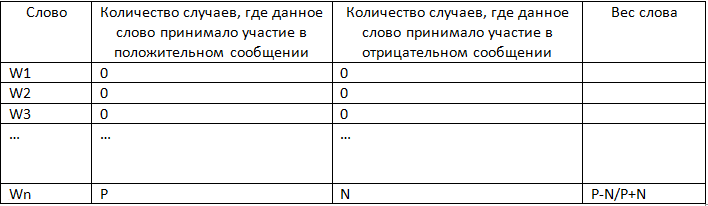

In [17]:
def filling_used_train_words(dataframe, dic):
    
    i = -1
    for index, row in dataframe.iterrows():
        i += 1
        
        spisok = row['clear_text']
        
        for w in str(spisok).split():
            if row['type'] == 1:
                dic.get('pos')[l.index(w)] += 1
            if row['type'] == -1:
                dic.get('neg')[l.index(w)] += 1

        if (i % 10000 == 0):
            print('обработана ', i, 'строка из 204150: ', i/2041.5, ' %\n')
    return dic

In [18]:
dictionary_train_words = filling_used_train_words(train, dic) #проходя по каждой строчке train, заполняем таблицу

обработана  0 строка из 204150:  0.0  %

обработана  10000 строка из 204150:  4.898359049718344  %

обработана  20000 строка из 204150:  9.796718099436688  %

обработана  30000 строка из 204150:  14.695077149155033  %

обработана  40000 строка из 204150:  19.593436198873377  %

обработана  50000 строка из 204150:  24.49179524859172  %

обработана  60000 строка из 204150:  29.390154298310065  %

обработана  70000 строка из 204150:  34.28851334802841  %

обработана  80000 строка из 204150:  39.186872397746754  %

обработана  90000 строка из 204150:  44.0852314474651  %

обработана  100000 строка из 204150:  48.98359049718344  %

обработана  110000 строка из 204150:  53.88194954690179  %

обработана  120000 строка из 204150:  58.78030859662013  %

обработана  130000 строка из 204150:  63.678667646338475  %

обработана  140000 строка из 204150:  68.57702669605682  %

обработана  150000 строка из 204150:  73.47538574577517  %

обработана  160000 строка из 204150:  78.37374479549351  %

обра

In [19]:
wdf = pd.DataFrame(data=dictionary_train_words)

In [20]:
wdf['val'] = (wdf['pos'] - wdf['neg'])/(wdf['pos'] + wdf['neg'])

In [21]:
wdf.head(10)

,word,pos,neg,val
0,игра,682,489,0.164816
1,красн,211,147,0.178771
2,бел,306,190,0.233871
3,форм,101,70,0.181287
4,нарост,3,0,1.000000
5,класс,617,452,0.154350
6,погоня,16,7,0.391304
7,возьмут,8,14,-0.272727
8,лучш,915,440,0.350554
9,сервис,42,83,-0.328000


In [22]:
nul3 = [int(0) for i in range(n)]
dic['value'] = nul3

In [23]:
for k in range(n):
    q = (dictionary_train_words['pos'][k] - dictionary_train_words['neg'][k])/(dictionary_train_words['pos'][k] + dictionary_train_words['neg'][k])
    dictionary_train_words['value'][k] = q

In [24]:
#df.to_csv('dictionary_train_words.csv', index=False)

In [25]:
def my_model_predict(data, dic):
    
    data = data.tolist()
    pred = [int(-1) for i in range(len(data))]
    
    for z in range(len(data)):
        p = 0
        for w in str(data[z]).split():
            if w in l:
                p += dic['value'][l.index(w)]
        if p >= 0:
            pred[z] = 1
    return pred

In [26]:
pred = my_model_predict(test['clear_text'], dictionary_train_words)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print('My model ', accuracy_score(test['type'], pred))

My model  0.7060483159936519


Далее можно открыть ноутбук MyModel_upgrade, где будет попытка улучшить модель